In [ ]:
# Parameters
param_dict = {
  "cave": {
   "crop": {
    "top_left": {
      "x": 180,
      "y": 90
    },
    "bottom_right": {
      "x": 376,
      "y": 329
    }
  },
  "center": {
    "x": 93,
    "y": 117
  },
  "axis": {
    "x": 145,
    "y": 200
  },
  "start_angle": 136.03162523085507,
  "end_angle": 413.46078513766815,
  "start_range": 0.4,
  "end_range": 10,
  "minLineLength": 40,
  "maxLineGap": 1,
  "threshold_value": 170,
  "threshold_brightness": 255,
  "threshold_reverse": False
  },
  "water": {
    "crop": {
      "top_left": {
        "x": 100,
        "y": 100
      },
      "bottom_right": {
        "x": 600,
        "y": 600
      }
    },
    "center": {
      "x": 248,
      "y": 330
    },
    "curve": {
      "x": 430,
      "y": 430,
    },
    "start": {
      "angle": 223,
      "value": 100
    },
    "end": {
      "angle": 316,
      "value": 250
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 60,
    "threshold_brightness": 20,
    "threshold_reverse": True,
    "minLineLength": 170,
    "maxLineGap": 30
  },
  "gauge_1": {
    "crop": {
      "top_left": {
        "x": 50,
        "y": 50
      },
      "bottom_right": {
        "x": 650,
        "y": 650
      }
    },
    "center": {
      "x": 295,
      "y": 305
    },
    "curve": {
      "x": 500,
      "y": 500,
    },
    "start": {
      "angle": 135,
      "value": 0
    },
    "end": {
      "angle": 406,
      "value": 1000
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 190,
    "threshold_brightness": 130,
    "minLineLength": 90,
    "maxLineGap": 0
  },
}

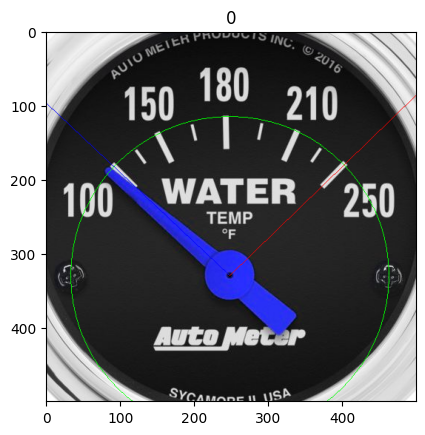

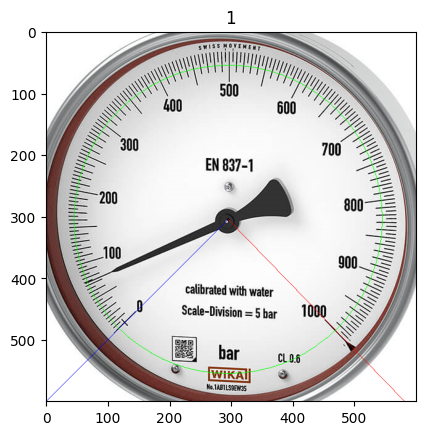

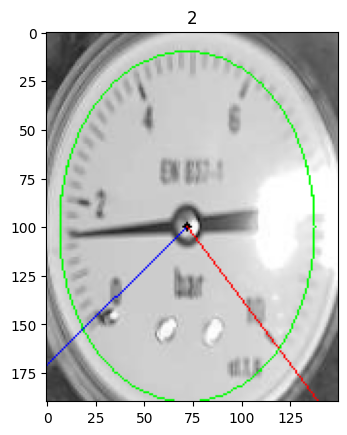

Type: water
Params: {'crop': {'top_left': {'x': 100, 'y': 100}, 'bottom_right': {'x': 600, 'y': 600}}, 'center': {'x': 248, 'y': 330}, 'curve': {'x': 430, 'y': 430}, 'start': {'angle': 223, 'value': 100}, 'end': {'angle': 316, 'value': 250}, 'number_of_shape_countours_threshold': 150, 'threshold_value': 60, 'threshold_brightness': 20, 'threshold_reverse': True, 'minLineLength': 170, 'maxLineGap': 30}
Type: gauge_1
Params: {'crop': {'top_left': {'x': 50, 'y': 50}, 'bottom_right': {'x': 650, 'y': 650}}, 'center': {'x': 295, 'y': 305}, 'curve': {'x': 500, 'y': 500}, 'start': {'angle': 135, 'value': 0}, 'end': {'angle': 406, 'value': 1000}, 'number_of_shape_countours_threshold': 150, 'threshold_value': 190, 'threshold_brightness': 130, 'minLineLength': 90, 'maxLineGap': 0}
Type: cave
Params: {'crop': {'top_left': {'x': 180, 'y': 90}, 'bottom_right': {'x': 330, 'y': 280}}, 'center': {'x': 72, 'y': 100}, 'curve': {'x': 131, 'y': 180}, 'start': {'angle': 144.5, 'value': 0.4}, 'end': {'angle':

In [17]:
from matplotlib import pyplot as plt
import cv2
import glob
import re
import numpy as np

# List all images with name image{X}.png
image_files = glob.glob('image_*_main.*')

# Load all images using cv2
images = [cv2.imread(image_file) for image_file in image_files]

# Extract the type part from the file name
type_pattern = re.compile(r'image_(.*?)_main\..*')
types = [type_pattern.search(file).group(1) for file in image_files]

ellipses = []

for i in range(len(images)):
  params = param_dict.get(types[i], None)

  ellipses.append(None)

  if params is None:
    continue

  
  crop_data = params.get("crop")
  top_left = (crop_data.get("top_left").get("x"), crop_data.get("top_left").get("y"))
  bottom_right = (crop_data.get("bottom_right").get("x"), crop_data.get("bottom_right").get("y"))
  
  images[i] = images[i][top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

  cp = images[i].copy()

  # Draw the center from params "center"
  center = (params.get("center").get("x"), params.get("center").get("y"))
  curve = (params.get("curve").get("x"), params.get("curve").get("y"))
  cv2.circle(cp, center, 2, (0,0,0), -1)

  # Draw the start point from params "start"
  # start = (params.get("start").get("x"), params.get("start").get("y"))
  start_angle = params.get("start").get("angle")
  start_angle_rad = np.radians(start_angle)
  start = (int(center[0] + curve[0] * np.cos(start_angle_rad)), int(center[1] + curve[1] * np.sin(start_angle_rad)))
  cv2.line(cp, center, start, (0, 0, 255), 1)

   # Draw the end point from params "end"
  # end = (params.get("end").get("x"), params.get("end").get("y"))
  end_angle = params.get("end").get("angle")
  end_angle_rad = np.radians(end_angle)
  end = (int(center[0] + curve[0] * np.cos(end_angle_rad)), int(center[1] + curve[1] * np.sin(end_angle_rad)))
  cv2.line(cp, center, end, (255, 0, 0), 1)

  ellipse = (center, (params.get("curve").get("x"), params.get("curve").get("y")), 0)
  ellipses[i] = ellipse

  cv2.ellipse(cp, ellipse, (0, 255, 0), 1)

  plt.imshow(cp)
  plt.title(i)
  plt.show()

for i in range(len(images)):
  print("Type:", types[i])
  print("Params:", param_dict.get(types[i], None))


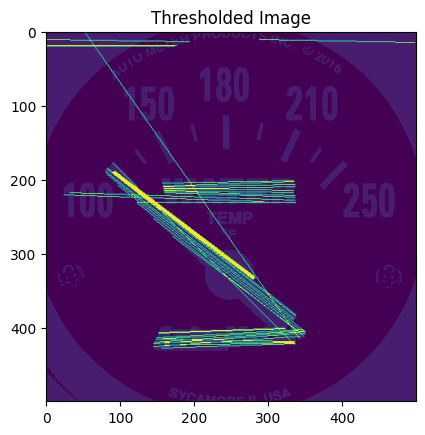

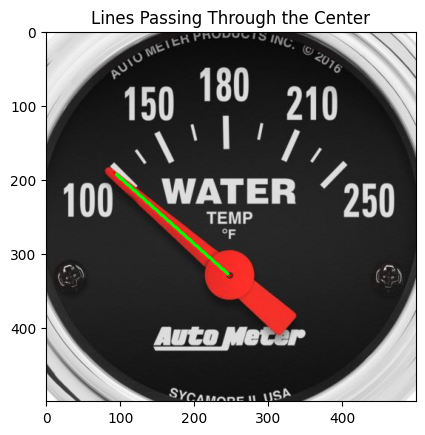

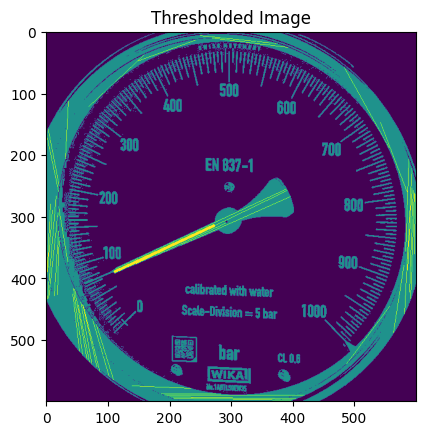

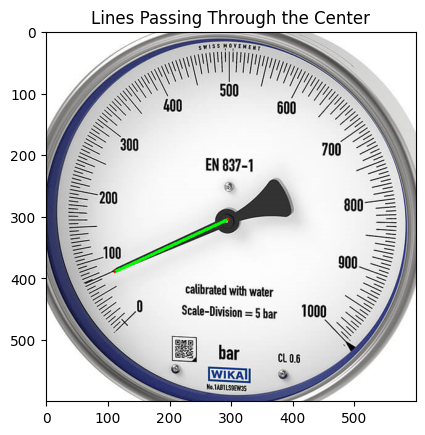

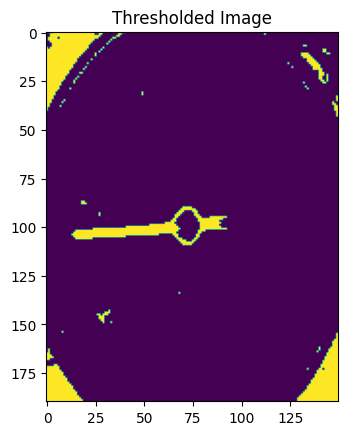

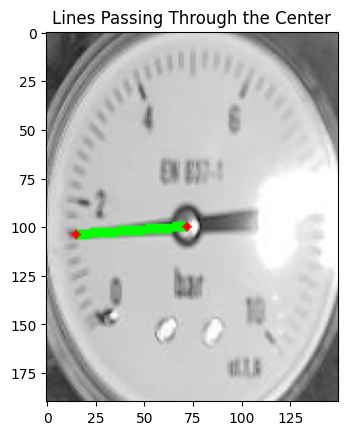

In [18]:

import app.helpers as helpers

needle_points = []
for a in range(len(images)):
  params = param_dict.get(types[a], None)
  needle_points.append(None)
  ellipse = ellipses[a]

  if ellipse is None:
    continue

  needle_point, filtered_lines, all, dst2 = helpers.find_needle(
    images[a], 
    ellipse, 
    params.get("threshold_value"), 
    params.get("threshold_brightness"), 
    params.get("minLineLength"), 
    params.get("maxLineGap"), 
    params.get("threshold_reverse")
  )

  thresh = dst2.copy()
  render_needle = images[a].copy()

  if not needle_point is None:
    needle_points[a] = needle_point
     # Draw the lines on the ROI
    cv2.line(render_needle, needle_point, ellipse[0], (0, 255, 0), 3)

    # Draw the furthest point on the ROI
    cv2.circle(render_needle, needle_point, 2, (0, 0, 255), -1)

    # Draw the center of the ROI
    cv2.circle(render_needle, ellipse[0], 2, (0, 0, 255), -1)


  # Draw all the filtered lines on the ROI
  for line in all:
    x1, y1, x2, y2 = line[0]
    cv2.line(thresh, (x1, y1), (x2, y2), (255, 0, 0), 1)

  # Draw all the filtered lines on the ROI
  for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(thresh, (x1, y1), (x2, y2), (255, 0, 255), 3)

 
  # Display the image dst2
  plt.imshow(thresh)
  plt.title('Thresholded Image')
  plt.show()

  # Display the image with lines
  plt.imshow(cv2.cvtColor(render_needle, cv2.COLOR_BGR2RGB))
  plt.title('Lines Passing Through the Center')
  plt.show()

Files matching pattern 'image_water_*': ['image_water_main.jpg']


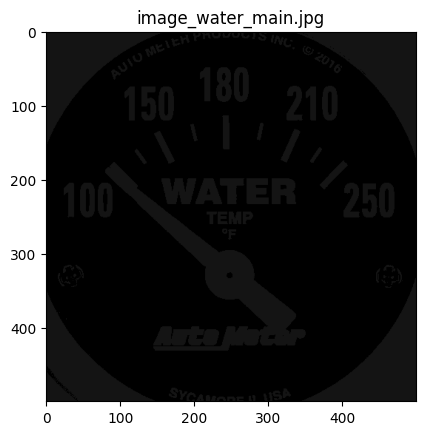

Value for image_water_main.jpg: 97.90622097792836


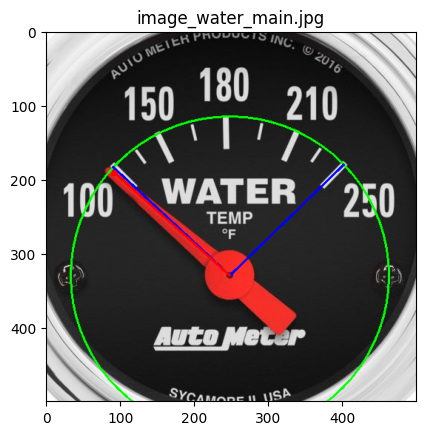

Files matching pattern 'image_gauge_1_*': ['image_gauge_1_main.png']


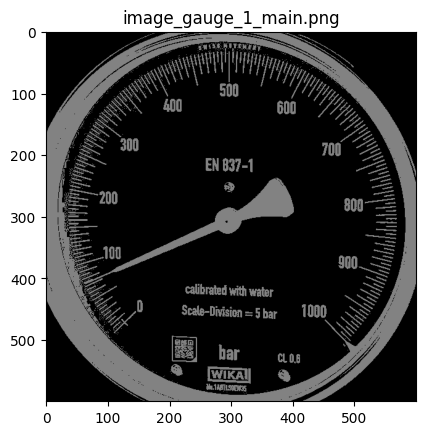

Value for image_gauge_1_main.png: 74.55762318391506


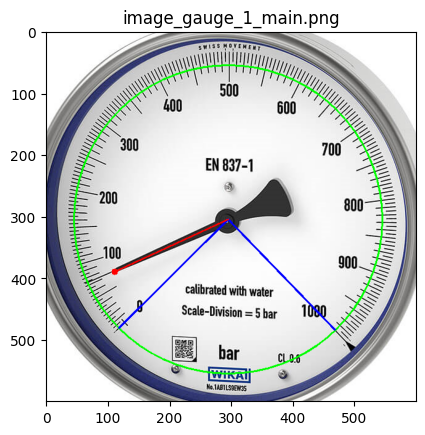

Files matching pattern 'image_cave_*': ['image_cave_1.png', 'image_cave_main.png']


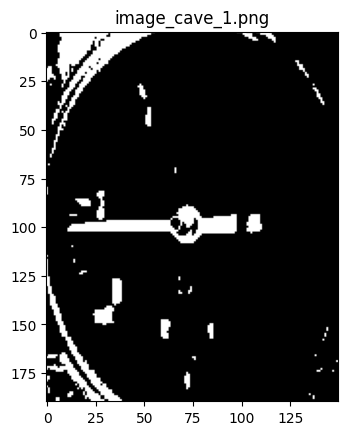

Value for image_cave_1.png: 1.6785501615450427


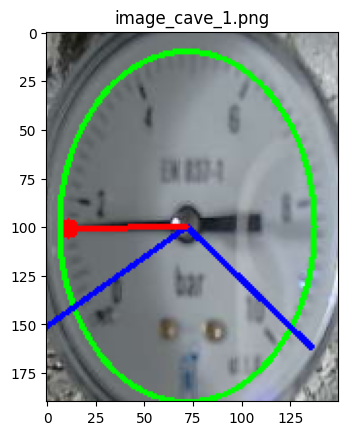

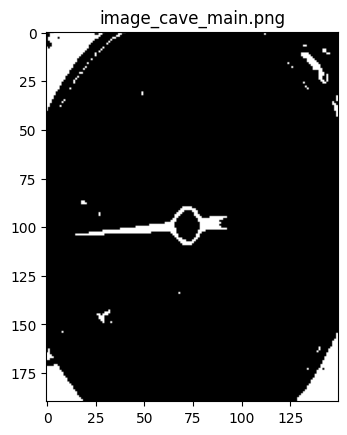

Value for image_cave_main.png: 1.5647935002853721


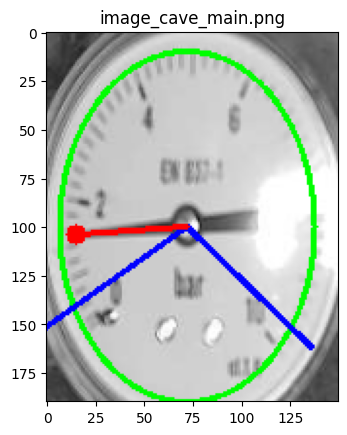

In [19]:
import numpy as np

from app.helpers import GaugeValueExtractor

# Look for files matching the pattern "image_{type}_{x}.png"
for a in range(len(images)):
  pattern = f'image_{types[a]}_*'
  matching_files = glob.glob(pattern)
  params = param_dict.get(types[a], None)
  
  print(f"Files matching pattern '{pattern}': {matching_files}")

  # Load each matching image using cv2
  for file in matching_files:
    image = cv2.imread(file)

    ellipse = ellipses[a]

    if ellipse is None or params is None:
      continue

    start_angle = params.get("start").get("angle")
    end_angle = params.get("end").get("angle")

    center = ellipse[0]
    radius_x = ellipse[1][0] / 2
    radius_y = ellipse[1][1] / 2

    crop_data = params.get("crop")
    top_left = (crop_data.get("top_left").get("x"), crop_data.get("top_left").get("y"))
    bottom_right = (crop_data.get("bottom_right").get("x"), crop_data.get("bottom_right").get("y"))

    extractor = GaugeValueExtractor(
      top_left, 
      bottom_right, 
      params.get("threshold_value"), 
      params.get("threshold_brightness"), 
      params.get("threshold_reverse"),
      params.get("minLineLength"), 
      params.get("maxLineGap"), 
      start_angle,
      end_angle,
      params.get("start").get("value"), 
      params.get("end").get("value"),
      ellipse,
    )

    gauge_value = extractor.extract_value(image)
    debug_image, debug = extractor.draw_debug_image(image)

    plt.imshow(cv2.cvtColor(debug, cv2.COLOR_BGR2RGB))
    plt.title(file)
    plt.show()

    if gauge_value is None:
      print(f"No value found for {file}")
      continue
    
    print(f"Value for {file}: {gauge_value}")

    plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB))
    plt.title(file)
    plt.show()

